Make a jupyter notebook that uses mdtraj to 
* read in the md trajectory of beta amyloid
* compute the end-end distance at each time, and the radius of gyration at each time
* plot the end-end distance and radius of gyration vs time on the same plot, clearly labeled (same y axis is fine this time)
* plot a normalized histogram of end-end distance and another of radius of gyration
	

In [1]:
import mdtraj as md
import numpy as np
from matplotlib import pyplot as plt

In [2]:
traj = md.load_xtc("../Data/1hz3_T310.stepid25000000.every100ps.nowater.xtc", top="../Data/1hz3_T310.start.nowater.gro")

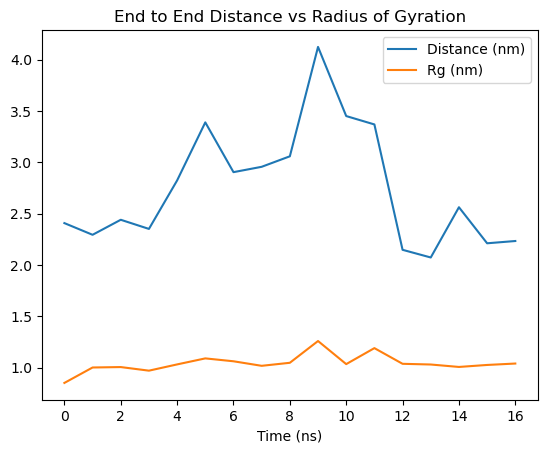

In [3]:
# end_end calculation taken from end_end.ipynb
# compute the distance between the first and last atom
def end_end(traj):
    # get the first and last atom
    first = traj.xyz[:,0,:]
    last = traj.xyz[:,-1,:]
    # compute the distance between the first and last atom
    dist = np.sqrt(np.sum((first-last)**2, axis=1))
    return dist

# compute the distance between the first and last atom
dist = end_end(traj)

# compute the radius of gyration of the protein
rg = md.compute_rg(traj)

#plot distance vs time
#plt.plot(traj.time, dist)
plt.xlabel('Time (ns)')
#plt.ylabel('Distance (nm)')
plt.title('End to End Distance vs Radius of Gyration')


# plot 
plt.plot(traj.time / 1000, dist, label='Distance (nm)')
plt.plot(traj.time / 1000, rg, label='Rg (nm)')

plt.legend()
plt.show()

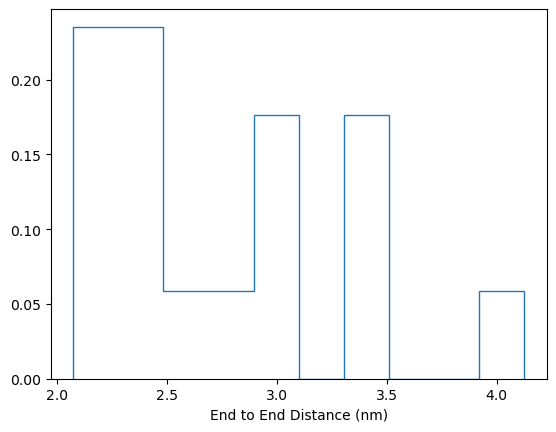

In [4]:
# end to end distance histogram
hist, bins = np.histogram(dist, density=False)
plt.stairs(hist / np.sum(hist), bins)
plt.xlabel("End to End Distance (nm)")
plt.show()

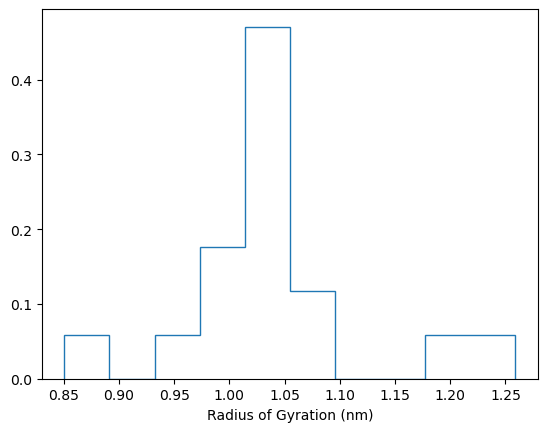

In [5]:
# radius of gyration histogram
hist, bins = np.histogram(rg, density=False)
plt.stairs(hist / np.sum(hist), bins)
plt.xlabel("Radius of Gyration (nm)")
plt.show()

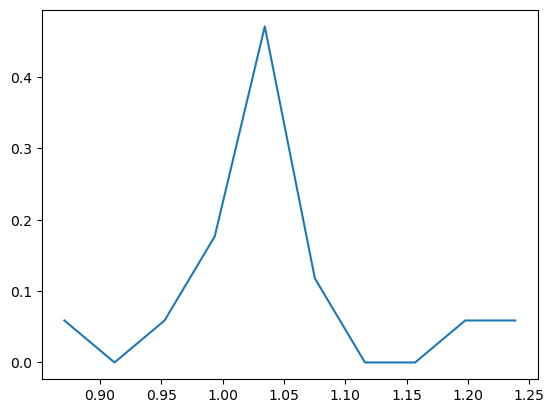

In [6]:
# radius of gyration histogram (another way)
hist, bins = np.histogram(rg, density=True)
center_bins = bins
center_bins = bins + ((bins[1] - bins[0]) / 2)
plt.plot(center_bins[:-1], hist / np.sum(hist))
plt.show()

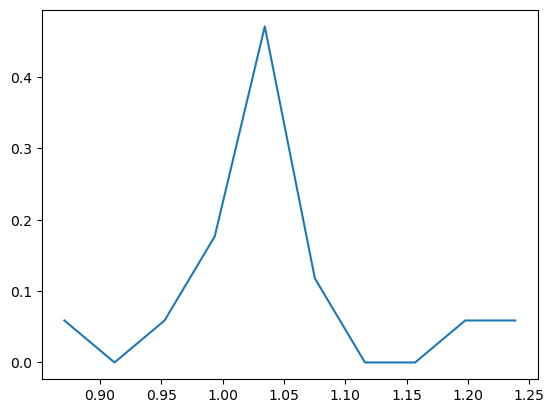

In [10]:
# radius of gyration histogram (another another way)
hist, bins = np.histogram(rg, density=True)
bin_centers = (bins[1:] + bins[:-1]) / 2
plt.plot(bin_centers, hist / np.sum(hist))
plt.show()